# <span style="color: blue">Laboratorio 1: Gráficos</span> <a class="tocSkip"> 

### <span style="color: green">Prof. Andrés Arguedas - XS-0300 - II 2020 con colaboraciones de Andrea Vargas</span> <a class="tocSkip"> 

*Este laboratorio es parte del curso XS-0300 Estadística para Biología I de la Escuela de Estadística de la Universidad de Costa Rica, y se presenta con una licencia [CC-BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/).*

**ATENCIÓN:** Antes de entregar este laboratorio, asegúrese que todo corre como se espera. Para hacer esto, primero **reinice el kernel**, esto lo puede hacer seleccionado **Kernel** en el menú y luego **Restart**. Habiendo reiniciado el kernel, **corra todas las celdas**, esto lo puede hacer seleccionando **Cell** en el menú y luego **Run All**.

Por último, recuerde rellenar cualquier lugar donde diga `ESCRIBA SU CÓDIGO AQUÍ` o "ESCRIBA SU RESPUESTA AQUI", así como escribir su nombre y carné a continuación:

In [ ]:
NOMBRE = ""
CARNE = ""

---

## Preparación para este laboratorio
    
El presente laboratorio tiene como objetivos de aprendizaje:
    
1. Saber que es un archivo `.csv`
2. Conocer el paquete `readr` y como cargar archivos `.csv` a R
3. Entender la utilidad y forma de utilizar los comandos `mutate()` y `rename()` del paquete `dplyr`
4. Discernir la diferencia en métodos y motivación entre hacer gráficos en R base y con `ggplot2`
5. Crear gráficos de dispersión y de barras utilizando las capacidades de R

En este laboratorio utilizaremos el conjunto de datos de `aves`, junto con los paquetes `ggplot2`, `dplyr` y `readr`. Ya todos estos paquetes están descargados y disponibles en el entorno virtual, al igual que el conjunto de datos, por lo que no es necesario que descarguen o consigan ningún paquete o conjunto de datos adicional, todos ya están disponibles.

---

## Conjunto de datos `aves`

El conjunto de datos de `aves`, contenido en el archivo [`aves.csv`](https://raw.githubusercontent.com/andresarguedas/LabXS0300-content/master/data/aves.csv), contiene una serie de observaciones realizadas de dos especies de aves en cuatro localidades. Para todas estas aves se documentaron las siguientes variables:

- `Localidad`: La localidad en el cual se hizo la observación: **Cerro de la Muerte**, **Irazú**, **Barva** o **Poás**
- `Especie`: La especie a la cual pertenece el individuo: *Chlorospingus pileatus* o *Catharus gracilirostris*
- `Largo pico`: El largo del pico, medido en cm
- `Ala`: El largo del ala, medido en cm
- `Cola`: El largo de la cola, medido en cm
- `Tarso`: El largo del tarso, medido en cm
- `Juanete`: El largo del juanete, medido en cm
- `Alto pico`: La altura del pico, medido en cm
- `Ancho pico`: El ancho del pico, medido en cm
- `Peso`: El peso del ave, medido en g

En total, se tienen 97 observaciones distintas, la mayoría con datos en todas las variables, los cuales se usarán a lo largo de este laboratorio y de algunos de los siguientes laboratorios. Esta es una foto de un individuo de cada una de las especies:

### *Chlorospingus pileatus* <a class="tocSkip"> 

<p><a href="https://commons.wikimedia.org/wiki/File:Sooty-capped_Bush-tanager.jpg#/media/Archivo:Sooty-capped_Bush-tanager.jpg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/Sooty-capped_Bush-tanager.jpg/1200px-Sooty-capped_Bush-tanager.jpg" alt="Sooty-capped Bush-tanager.jpg"></a><br>De <a rel="nofollow" class="external text" href="https://www.flickr.com/photos/7457894@N04">Jerry Oldenettel</a> - originalmente subida a <a href="//commons.wikimedia.org/wiki/Flickr" class="mw-redirect" title="Flickr">Flickr</a> como <a rel="nofollow" class="external text" href="https://www.flickr.com/photos/7457894@N04/2308450870">DSC_5075a.jpg</a>, <a href="https://creativecommons.org/licenses/by-sa/2.0" title="Creative Commons Attribution-Share Alike 2.0">CC BY-SA 2.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=3878999">Enlace</a></p>

### *Catharus gracilirostris* <a class="tocSkip"> 

<p><a href="https://commons.wikimedia.org/wiki/File:Black-billed_Nightingale-thrush.jpg#/media/Archivo:Black-billed_Nightingale-thrush.jpg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Black-billed_Nightingale-thrush.jpg/1200px-Black-billed_Nightingale-thrush.jpg" alt="Black-billed Nightingale-thrush.jpg"></a><br>De <a rel="nofollow" class="external text" href="https://www.flickr.com/photos/7457894@N04">Jerry Oldenettel</a> - originalmente subida a <a href="//commons.wikimedia.org/wiki/Flickr" class="mw-redirect" title="Flickr">Flickr</a> como <a rel="nofollow" class="external text" href="https://www.flickr.com/photos/7457894@N04/2307608219">DSC_5055a.jpg</a>, <a href="https://creativecommons.org/licenses/by-sa/2.0" title="Creative Commons Attribution-Share Alike 2.0">CC BY-SA 2.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=3882594">Enlace</a></p>

Ya sabemos en que consiste el conjunto de datos con el que trabajaremos, ¿pero cómo hacemos para cargarlo en R? Esto lo veremos en la próxima sección.

---

## Archivos `.csv` y el paquete `readr`

Hasta el momento, solamente hemos trabajo con datos en R que nosotros mismos hemos guardado en memoria mediante la función de asignación `<-`. Pero, ¿qué pasa si queremos cargar datos que ya hemos recolectado y tenemos guardados en la computadora? Aunque R por default tiene soporte para importar y leer datos en diversos formatos, hay muchos paquetes que ofrecen mejorías sobre las funciones básicas de importación de datos y agregan nuevos formatos soportados. En este laboratorio, nos vamos a enfocar principalmente en un tipo específico de archivos, llamados csv, y utilizando un paquete en específico `readr` para lograr cargarlos a R.

### ¿Qué es un archivo `.csv`?

Un archivo `.csv` es un tipo de archivo donde los datos se separan en columnas mediante comas (**C**omma **S**eparated **V**alues en inglés). Actualmente, un archivo csv no necesita estar separado por comas estrictamente, sino que puede estar separado por espacios, tabulaciones o punto y comas; lo importante es que haya alguna forma de delimitar las columnas unas de otras. La forma más sencilla de pensar en un archivo csv es como un archivo de Excel con solamente los datos separados en columnas y filas. Un ejemplo ilustrativo de un posible archivo csv se presenta a continuación:

```
x, y, z
1, 2, 3
5, 6, 7
```

Como se puede ver, por lo general la primera línea contiene los nombres de las variables, separados mediante comas, de forma que la computadora entiende que la primera columna se llama `x`, luego `y` y, por último, `z`. Como después de la `z` no hay una coma, la computadora entiende que ya no hay más columnas, por lo que tiene que pasar a la siguiente fila. En la siguiente fila el primer valor es un `1` antes de la coma, por lo que el primer valor de la primer columna (`x`) va a ser 1, y así con todas las demás columnas y filas del archivo. En conclusión, otra forma de ver el anterior archivo csv es como se presenta en la siguiente tabla:

|x|y|z|
|-|-|-|
|1|2|3|
|5|6|7|

Para que la computadora puede entender como leer los datos es muy importante siempre específicar como están divididos los datos, es decir, cual separador están usando.

### El paquete `readr`

Aunque R puede leer nativamente archivos csv mediante la función `read.csv`, el paquete [`readr`](https://readr.tidyverse.org), el cual es parte del `tidyverse`, contiene una serie de mejoras y facilidades para poder importar y trabajar con archivos csv, entre otros. Pueden consultar un cheat sheet con comandos de `readr`, en inglés, en el [siguiente enlace](https://rawgit.com/rstudio/cheatsheets/master/data-import.pdf). 

La función que más usaremos del paquete `readr` es `read_csv`, que se puede utilizar de la siguiente forma:

```{r}
library(readr)
# Recuerden que siempre ocupamos cargar
# el paquete antes de usar una función de dicho paquete!
objeto <- read_csv("datos.csv")
```

En el ejemplo anterior, tenemos los siguientes elementos:
- `objeto` es el nombre en memoria que le asignaremos al conjunto de datos que estamos cargando desde la computadora
- `read_csv()` es la función que usaremos para leer los datos de la computadora a R
- `"datos.csv"` es el nombre del conjunto de datos en la computadora que queremos cargar a R

¡Y eso es todo! Hay otros argumentos que veremos más adelante que podemos usar para especificar el tipo de variables que estamos cargando en cada columna, o posibles valores faltantes, llamados `NA`'s, pero por ahora esto es todo lo que ocupamos saber para cargar conjuntos de datos a R.

### Cargando el conjunto de datos `aves`

Como se describió en la sección 2, el conjunto de datos de aves contiene una serie de mediciones de aves de dos especies: *Cholorospingus pileatus* y *Catharus gracilirostris*, y en cuatro lugares distintos: Cerro de la Muerte, Irazú, Barva y Poás. En el caso de los conjuntos de datos para los laboratorios, estos ya están disponibles en línea, de forma que no es necesario que los descarguen o que hagan ningún procedimiento adicional para que estos estén disponibles, sino que por default estarán en un fólder, llamado `data`. Por lo tanto, el conjunto de datos `aves.csv` estará disponible si lo llamamos como `data/aves.csv`. Por lo tanto, para cargar este conjunto de datos en R, con el nombre en memoria de `aves`, poedmos hacer lo siguiente:

In [ ]:
library(readr)

aves <- read_csv("data/aves.csv")

Esto lo podemos hacer directamente en RStudio desde la interfaz gráfica utilizando el siguiente procedimiento:

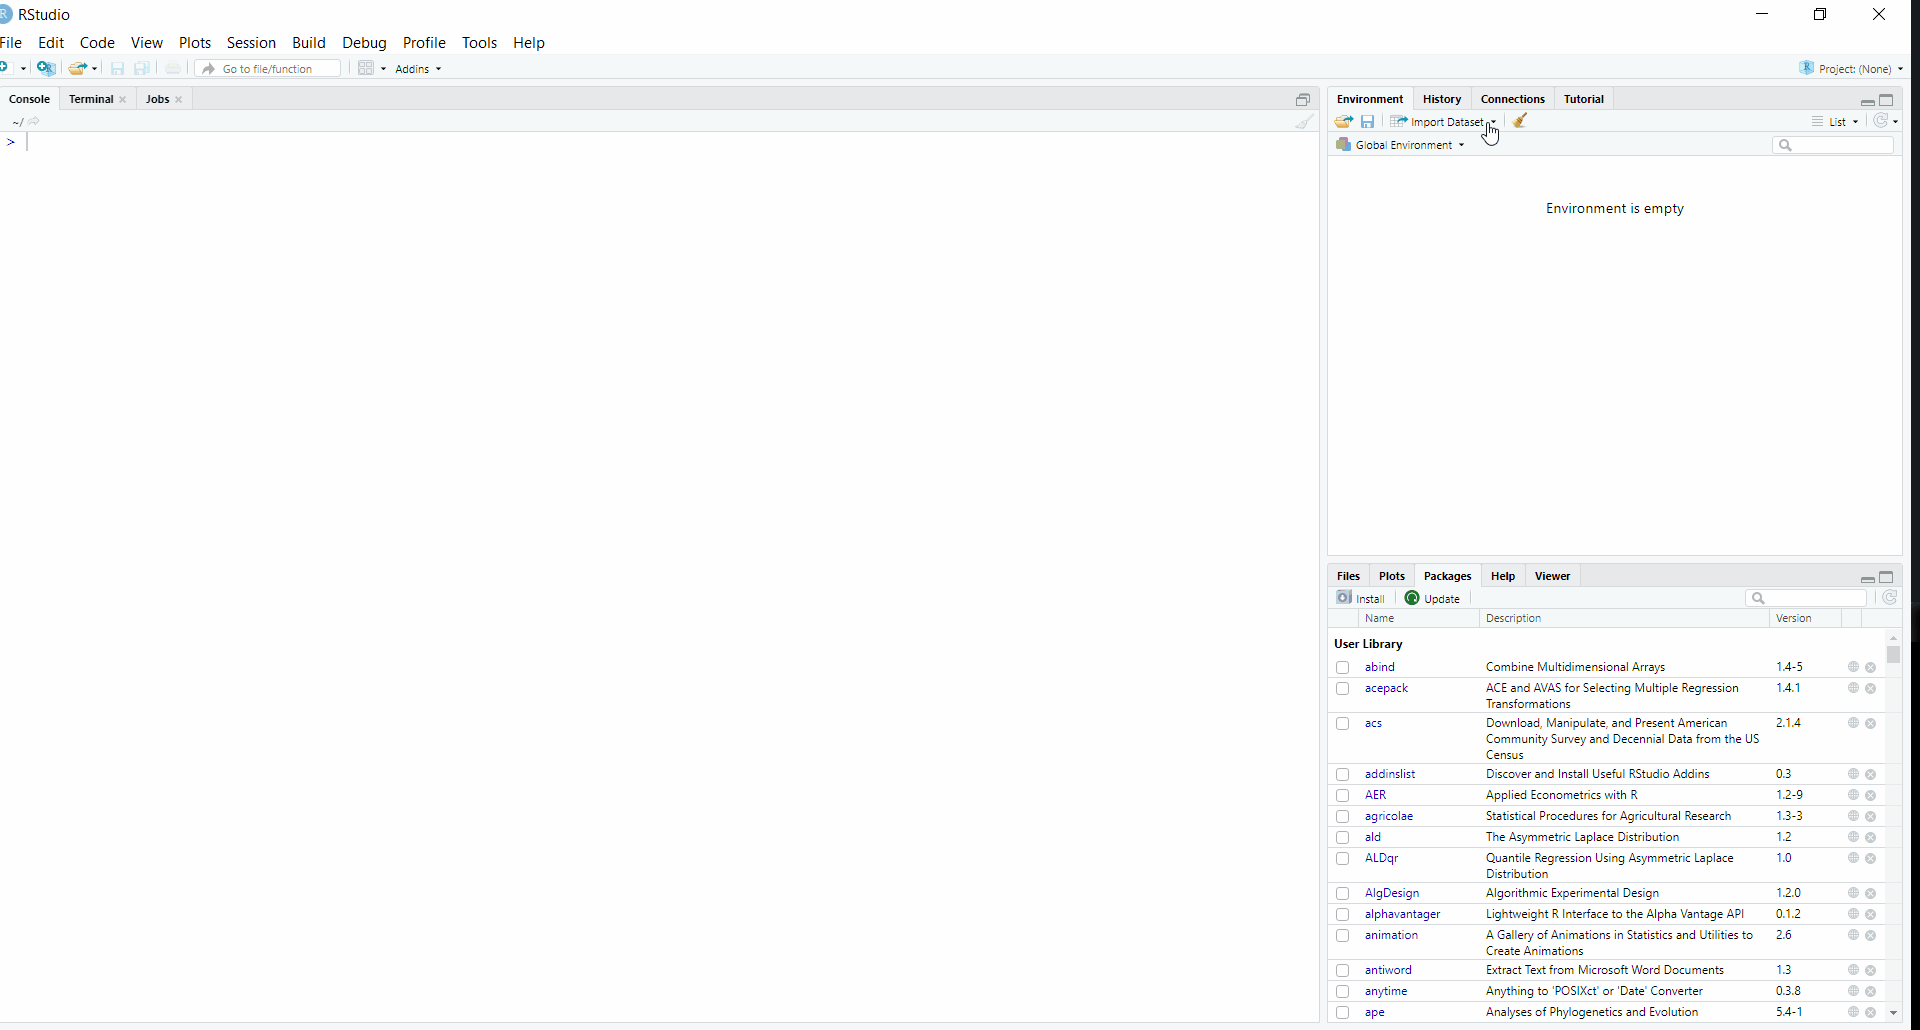

Primero, es importante resaltar que ocupamos correr el comando `library(readr)` para poder cargar el paquete `readr` en R y utilizar la función `read_csv` para cargar los datos. **Recuerden que siempre ocupamos cargar los paquetes antes de poder utilizar las funciones que vienen en ellos.** Una vez que hayan corrido el bloque anterior, les debería salir un mensaje como el siguiente:

```{r}
Parsed with column specification:
cols(
  Localidad = col_double(),
  Especie = col_character(),
  `Largo pico` = col_double(),
  Ala = col_double(),
  Cola = col_double(),
  Tarso = col_double(),
  Juanete = col_double(),
  `Alto pico` = col_double(),
  `Ancho pico` = col_double(),
  Peso = col_double()
)
```

Esto se debe a que no estamos especificando el nivel de medición de cada variable, por lo que `readr` tiene que hacer suposiciones que, aunque por lo general son correctas, pueden estar equivocadas. De forma general, las especificaciones de las columnas más usuales son las siguientes:

- `col_logical()`: valores lógicos, es decir, `T`, `F`, `TRUE`, `FALSE`
- `col_double()`: cualquier tipo de valor numérico
- `col_integer()`: números enteros, es decir, sin decimales. Se prefiere utilizar `col_double()` en la mayoría de los casos
- `col_factor()`: variable factor con una serie fija de valores que puede tomar
- `col_character()`: la información se devuelve como un string a R

Como mencionamos anteriormente, `readr` busca "adivinar" el tipo de variable con base en ciertos lineamientos y lo más usual es que termine con variables tipo `col_double()` y `col_character()`. Aunque podemos especificar directamente el tipo de variable de cada columna a la función `read_csv`, por ahora vamos a trabajar con los defaults que nos tira. Veamos los datos de `aves` que acabamos de cargar en R:

In [ ]:
aves

Como se puede ver, en la parte de arriba de la salida anterior nos dice *A spec_tbl_df: 97 x 10*. En este caso *spec_tbl_df* nos está diciendo que `aves` es un **data frame**, mientras que *97 x 10* nos indica que el conjunto de datos `aves` tiene **97 observaciones en 10 columnas**. La primera fila de la tabla anterior contiene los nombres de las variables, que son: `Localidad`, `Especie`, `Largo pico`, `Ala`, `Cola`, `Tarso`, `Juanete`, `Alto pico`, `Ancho pico` y `Peso`. Aquí nos encontramos con el primer problema con los datos que acabamos de importar: **los nombres de las variables no deberían tener espacios**. Esto se debe a que, al igual que con los nombres de las variables, R considera un espacio en un nombre como dos objetos distintos, por lo que ocupamos cambiar el nombre de las variables `Largo pico`, `Alto pico` y `Ancho pico` para que no tengan espacios.

Por otro lado, si vemos la segunda fila del resultado anterior, esta nos dice el tipo de variable con el que estamos trabajando; en este caso **`<dbl>`** para una numérica y **`<chr>`** para una de caracter. Aquí nos encontramos con el segundo problema con los datos que acabamos de importar: **las variables numéricas deben ser `<dbl>` mientras que las cualitativas, por lo general, deberían ser factores o `<fct>`.** Esto lo podemos solucionar cambiando tanto `Localidad` como `Especie` a factores, ya que todas las variables numéricas ya son numéricas en R.

Por último, el resultado también nos muestra *algunos* (léase no todos) los datos que están en `aves`. Esto nos puede ayudar para hacernos una idea general sobre el comportamiento de los datos pero es muy difícil llegar a conclusiones solamente viendo los datos sueltos, que es por lo que queremos hacer gráficos. Además hay algunos datos que aparecen con `NA`, como por ejemplo en la variable `Peso`, lo que significa que no se tiene información para esa variable para ese individuo. Por ahora, los gráficos que hacemos por default eliminan estos `NA`'s, o valores perdidos, pero en los próximos laboratorios veremos como trabajar con estos datos.

En resumen, tenemos dos problemas con el conjunto de datos `aves` que ocupamos solucionar:

- [ ] Cambiar el nombre de  las variables `Largo pico`, `Alto pico` y `Ancho pico` para que no tengan espacios
- [ ] Cambiar las variables `Localidad` y `Especie` para que sean factores

En la próxima sección veremos como solucionar estos problemas.

---

## Manipulando conjuntos de datos en R con `dplyr`

En el laboratorio anterior mencionamos el paquete `dplyr` junto con el operador pipe (`%>%`), pero hay mucho más que este paquete puede hacer para facilitarnos el trabajo de manipular y trabajar con conjuntos de datos en R. Por lo tanto, el objetivo de esta sección es presentar algunas de las funciones principales de `dplyr` que nos van a ayudar a lo largo del curso. Para empezar, vamos a cargar el paquete `dplyr` para poder utilizar todas las funciones que veremos a continuación:

In [ ]:
library(dplyr)

### El comando `mutate()`

Cuando querramos modificar una columna, o crear columnas nuevas, en un conjunto de datos podemos usar el comando `mutate()` del paquete `dplyr` para poder lograrlo. La sintáxis para usar esta función es la siguiente:

`mutate(datos, Col_nueva = fun(Col))`

donde `datos` es el nombre del conjunto de datos que queremos modificar, `Col_nueva` es el nombre de la nueva columna que queremos crear, `fun()` es una función que queremos aplicar a la columna original para transformarla y `Col` es la columna original. De igual forma, podríamos modificar una misma columna cambiando `Col_nueva` por `Col`.

---

**Ejemplo:** Vamos a crear una nueva variable en el conjunto de datos `aves`, llamada `Peso_cuadrado` que sea el peso del ave elevado al cuadrado, usando el comando `mutate()`. Esto lo podemos hacer mediante el siguiente comando:

In [ ]:
mutate(aves, Peso_cuadrado = Peso^2)

Como podemos ver, ahora tenemos una nueva variable, llamada `Peso_cuadrado` que contiene el peso de las aves, elevado al cuadrado.

---

Usando un pipe `%>%` podemos hacer el comando anterior de forma incluso más sencilla, utilizando la siguiente sintáxis:

`datos %>% mutate(Col_nueva = fun(Col))`

Como podemos ver, lo único que cambió es que ahora `datos` está a la izquierda del pipe y no dentro del `mutate()`, ya que el pipe lo está introduciendo ahí automáticamente.

---

**Ejemplo:** Podemos agregar la columna `Peso_cuadrado` de forma más sencilla usando un pipe:

In [ ]:
aves %>% mutate(Peso_cuadrado = Peso^2)

---

Adicionalmente, podemos manipular varias columnas al mismo tiempo separando con una `,` dentro del comando `mutate()`, de la siguiente forma:

`datos %>% mutate(Col_nueva1 = fun1(Col1), Col_nueva2 = fun2(Col2), ...)`

Esto nos permite ahorrar tiempo y espacio, ya que podemos convertir todas las variables al mismo tiempo. Por lo tanto, si quiseramos convertir las variables de `Especie` y `Localidad` en factor, podríamos hacer lo siguiente:

In [ ]:
aves %>% mutate(Especie = factor(Especie),
                Localidad = factor(Localidad))

Aunque los datos parecen no haber cambiado, si nos fijamos debajo de **Localidad** y **Especie** en la tabla anterior, ahora estos presentan **`<fct>`** como debería ser, en lugar de **`<dbl>`** y **`<chr>`**. Por lo tanto, con la ayuda del comando `mutate()` pudimos solucionar uno de nuestros problemas:

- [ ] Cambiar el nombre de  las variables `Largo pico`, `Alto pico` y `Ancho pico` para que no tengan espacios
- [X] Cambiar las variables `Localidad` y `Especie` para que sean factores

### El comando `rename()`

Cuando querramos cambiar el nombre de alguna variable en un conjunto de datos, podemos hacer uso de la función `rename()` del paquete `dplyr`. La sintáxis de esta función es:

`rename(datos, Nuevo_nombre = Col)`

o usando pipes:

`datos %>% rename(Nuevo_nombre = Col)`

donde `datos` es el conjunto de datos, `Col` es la columna a la cual queremos cambiar el nombre y `Nuevo_nombre` es el nuevo nombre que le queremos poner a dicha columna. En este caso `rename()` no crea una nueva columna, sino que simplemente cambia el nombre de la columna, pero no toca los datos de fondo, como lo hace `mutate()`. De igual forma que `mutate()`, eso si, nos permite cambiar el nombre de múltiples columnas al mismo tiempo separándolas mediante `,`.

Por lo tanto, podemos cambiar el nombre de las variables `Largo pico`, `Alto pico` y `Ancho pico` de nuestro conjunto de datos, usando `rename()`, de la siguiente forma:

In [ ]:
aves %>% rename(Largo_pico = `Largo pico`, 
                Alto_pico = `Alto pico`, 
                Ancho_pico = `Ancho pico`)

Como podemos ver, ahora las columnas `Largo pico`, `Alto pico` y `Ancho pico` se llaman `Largo_pico`, `Alto_pico` y `Ancho_pico`, respectivamente. Por lo general, cuando se quieren quitar espacios de nombres de variables o de columnas, los sustituimos por `_` o `.`. Lo último por resaltar es que cuando una columna tiene un nombre con espacios, necesitamos escribirla rodeada por ``` `` ```, para que el espacio no sea problemático. 

Por lo tanto, utilizando el comando `rename()` logramos solucionar uno de nuestros problemas:

- [X] Cambiar el nombre de  las variables `Largo pico`, `Alto pico` y `Ancho pico` para que no tengan espacios
- [X] Cambiar las variables `Localidad` y `Especie` para que sean factores

Verifiquemos que todo está como lo queremos en `aves`:

In [ ]:
aves

**¿Qué pasó?** Parece que no hicimos ningún cambio en `aves`: las variables siguen teniendo espacios y `Localidad` y `Especie` siguen siendo factores como antes, ¿pero por qué? Recordemos que, como todo en R, si queremos guardar un resultado que obtuvimos, lo necesitamos guardar mediante el comando de asignación `<-` por lo que, todo lo que hicimos con `rename()` y `mutate()` no quedó guardado en R, pero hay una forma muy sencilla de solucionar esto:

In [ ]:
aves <- aves %>% mutate(Especie = factor(Especie),
                        Localidad = factor(Localidad)) %>% 
                 rename(Largo_pico = `Largo pico`, 
                        Alto_pico = `Alto pico`, 
                        Ancho_pico = `Ancho pico`)

Como podemos ver, es cuestión de agregar un `aves <-` antes de los comandos que hicimos y R guardará los cambios que hicimos sobre el conjunto de datos `aves`. Otra cosa importante a tomar en cuenta es que podemos anidar los pipes, de tal forma que primero aplicamos un `mutate()` y luego un `rename()` sin ningún problema. Ahora si, verifiquemos que los cambios se guardaron:

In [ ]:
aves

Parece que ahora si se guardaron los cambios, y no tenemos ningún problema con el conjunto de datos `aves`, por lo que ya podemos empezar a hacer gráficos, que es a lo que nos dedicaremos en la próxima sección.

---

### Ejercicios (2pts.)

Con base en el conjunto de datos `aves` y utilizando las funciones vistas anteriormente, agregue dos nuevas columnas a `aves`, con las siguientes especificaciones:

- `razon`: La razón del tamaño del ala del ave con respecto a la longitud de su cola, es decir dividir el largo del ala entre el largo de la cola
- `tarso_mm`: El tamaño del tarso, medido en mm, es decir multiplicar el tamaño del tarso por 10

In [ ]:
# ESCRIBA SU CÓDIGO AQUÍ
testthat::fail() # No respuesta - elimine esta línea si escribió una respuesta

Corra las siguientes celdas para ver su respuesta y verifique que sea correcta:

In [ ]:
aves$razon

In [ ]:
aves$tarso_mm

---

## Gráficos en R (base y ggplot)

Una de las principales utilidades y ventajas de R es que permite hacer representaciones gráficas de muy alta calidad y con un alto grado de personalización. R trae, en sus paquetes por default, un sistema de graficación denominado **base** o **R base**, pero además hay muchos paquetes que permiten realizar gráficos de distintas formas; nosotros nos enfocaremos en uno específicamente: [`ggplot2`](https://ggplot2.tidyverse.org), aunque paquetes como `lattice` también se pueden usar. En este laboratorio vamos a hacer gráficos tanto con R base como con ggplot para poder hacer comparaciones entre ambos métodos y determinar cual es más sencillo de utilizar en ciertos casos.

Siempre que utilizemos ggplot para hacer gráficos, ocupamos cargar el paquete `ggplot2`, o sino no podremos correr los comandos, por lo que vamos a proceder a cargar este paquete:

In [ ]:
library(ggplot2)

### Gráficos de dispersión

Los gráficos de dispersión son muy usados y permiten ver la relación que existe entre dos variables numéricas, poniendo variables numéricas en los ejes *X* y *Y* y "pintando" los pares ordenados de cada observación para esas dos variables. Veamos un ejemplo donde comparamos `Ancho_pico` con `Alto_pico`.

#### R base

Hacer un gráfico de dispersión utilizando R base es cuestión de utilizar la función `plot()` de la siguiente forma:

`plot(datos$varx, datos$vary)`

donde `datos` es el conjunto de datos a utilizar, además `varx` y `vary` son variables numéricas de `datos`. Esto nos dará como resultado un gráfico de dispersión donde la variable `varx` estará en el eje *X* y la variable `vary` en el eje Y. Por lo tanto, se puede hacer el gráfico de dispersión de `Ancho_pico` con `Alto_pico` mediante el siguiente comando:

In [ ]:
plot(aves$Ancho_pico, aves$Alto_pico)

¡Listo! Eso es todo lo que ocupamos hacer para hacer un gráfico de dispersión con R base. Hay otras opciones que podemos usar, las cuales veremos algunas a continuación:

- `pch`: un número que define el tipo de punto a utilizar. Por default es 1, pero 16 también es muy utilizado
- `xlab` y `ylab`: nombres del eje *X* y *Y*, respectivamente. Debemos proporcionarlo entre comillas `""`
- `main`: nombre del título. Debemos proporcionarlo entre comillas `""`

Todos estos argumentos se separan mediante `,` dentro del comando `plot()`. Por lo que podríamos refinar el gráfico de la siguiente forma:

In [ ]:
plot(aves$Ancho_pico, aves$Alto_pico, pch = 16,
     xlab = "Ancho pico", ylab = "Alto pico",
     main = "Alto y ancho del pico de las aves")

#### `ggplot2`

Hacer un gráfico con ggplot toma más comandos que con R base pero también es bastante sencillo. Lo primero que ocupamos hacer es especificar cual variable estará en el eje *X* y cual en el eje *Y*, además del conjunto de datos que usaremos. Esto lo podemos hacer mediante la función `ggplot()` **(OJO: El paquete se llama `ggplot2` pero la función se llama `ggplot()`)**

`ggplot(datos, aes(x = varx, y = vary))`

donde `datos` es el conjunto de datos a utilizar, además `varx` y `vary` son variables numéricas de `datos`. En este caso, el primer argumento de `ggplot()` es el conjunto de datos que vamos a usar, mientras que dentro del argumento `aes()` especificamos todas las variables a utilizar, junto con otras características que veremos más adelante. Lo más importante a resaltar es que, si solamente corremos el comando presentado anteriormente, no tendremos el gráfico de dispersión, como si lo teníamos mediante `plot`, sino que simplemente crearemos un lienzo, como se ve a continuación:

In [ ]:
ggplot(aves, aes(x = Ancho_pico, y = Alto_pico))

Podemos ver que en el eje *X* está `Ancho_pico` y en el eje *Y* está `Alto_pico`, ¿pero dónde están los puntos? Esto se debe a que la forma de pensar detrás de ggplot es distinta a la filosofía utiliza por R base: R base crea todo el gráfico de un solo, mediante un solo comando, mientras que ggplot va agregando las partes del gráfico que nosotros queremos, de forma ordenada. Esto tiene la ventaja que permite un mayor nivel de personalización y gráficos de mejor calidad, pero tiene la desventaja de que necesitamos saber, de antemano, que tipo de gráfico queremos hacer; **ggplot no puede adivinar lo que queremos hacer, a diferencia de R base, que aunque sea intenta adivinar.**

Por lo tanto, si queremos agregar nuevos elementos gráficos, ocupamos hacerlo agregando un `+` al final de cada línea si queremos agregar un elemento adicional. En nuestro caso, podemos agregar puntos a un gráfico mediante el comando `geom_point()`:

In [ ]:
ggplot(aves, aes(x = Ancho_pico, y = Alto_pico)) +
    geom_point()

*¡Voilá!* Tenemos un gráfico de dispersión igual que con `plot()`. Vean que ocupamos agregar un `+` después de `ggplot()`, ya que queremos agregar puntos al lienzo, pero no después de `geom_point()`, dado que no queremos agregar ningún otro elemento gráfico adicional.

Cabe destacar que tanto `ggplot2` como `dplyr` son parte del `tidyverse`, por lo que ambos tienen soporte por pipes, de forma que podemos hacer el gráfico anterior de forma más sencilla usando pipes:

In [ ]:
aves %>% ggplot(aes(x = Ancho_pico, y = Alto_pico)) +
         geom_point()

Ahora, para poder cambiar los nombres de los ejes podemos usar la función `labs()` que tiene como argumentos `title`, `x` y `y` los cuales, bastante explicitamente, cambian el título y los nombres de los ejes *X* y *Y*, respectivamente. Al igual que con `plot()` estos nombres deben ir entre comillas `""` y podemos añadir la función `labs()` a nuestro gráfico agregando un `+` después de `geom_point()`, como se muestra a continuación:

In [ ]:
aves %>% ggplot(aes(x = Ancho_pico, y = Alto_pico)) +
         geom_point() +
         labs(title = "Alto y ancho del pico de las aves",
              x = "Ancho pico", y = "Alto pico")

Como podemos ver, el gráfico resultante es, en fondo, el mismo tanto con R base como con ggplot, aunque la apariencia es un poco distinto. Esto va a suceder con todos los gráficos que hagamos en este laboratorio, solo que en algunos será más sencillo con un método que con otro.

---

#### Ejercicio (2 pts.)

a) Haga un gráfico de dispersión relacionando el largo de la cola y del tarso de las aves del conjunto de datos, colocando la variable `Cola` en el eje *X* y `Tarso` en el eje *Y*. **Recuerde los lineamientos mínimos requeridos para la presentación de gráficos.**

In [ ]:
# ESCRIBA SU CÓDIGO AQUÍ
testthat::fail() # No respuesta - elimine esta línea si escribió una respuesta

b) ¿Qué puede concluir sobre la relación entre el largo de la cola y del tarso de las aves? ¿Hay algún valor extraño entre los datos?

ESCRIBA SU RESPUESTA AQUI

---

### Gráficos de dispersión por grupos

Una forma de poder agregar una tercer variable, categórica, a un gráfico de dispersión es mediante colores, de forma que coloreamos los puntos del gráfico dependiendo de la variable categórica a la que corresponden. Esto es, en el fondo, un gráfico de dispersión como los que vimos anteriormente, con la única diferencia de que vamos a agregar un nuevo argumento a las dos funciones anteriores. Por lo tanto, comparemos el alto y ancho del pico de las aves, separándolas según su especie:

#### R base

Para agregar color a los puntos, es cuestión de agregar el argumento `col` a la función `plot()`, especificando la variable de interés, y R lo agrega al gráfico:

#### `ggplot2`

Para agregar color a los puntos, es cuestión de agregar el argumento `col` dentro de `aes()`, especificando la variable de interés, y ggplot lo agrega al gráfico:

In [ ]:
plot(aves$Ancho_pico, aves$Alto_pico, pch = 16,
     col = aves$Especie,
     xlab = "Ancho pico", ylab = "Alto pico",
     main = "Alto y ancho del pico de las aves, separado según especie")

In [ ]:
aves %>% ggplot(aes(x = Ancho_pico, y = Alto_pico,
                    col = Especie)) +
         geom_point() +
         labs(title = "Alto y ancho del pico de las aves",
              x = "Ancho pico", y = "Alto pico")

Aquí podemos ver una de las ventajas de ggplot sobre R base: `ggplot()` crea automáticamente la leyenda, mientras que `plot()` no. De esta forma, viendo el gráfico de `plot()` no podemos saber a cual especie corresponden los puntos negros o rojos, mientras que con `ggplot()` nos dice explícitamente que los puntos <span style="color:red">rojos</span> son de <span style="color:red">*Catharus gracilirostris*</span> mientras que los <span style="color:lightblue">celeste</span> son de <span style="color:lightblue">*Chlorospingus pileatus*</span>. 

Para poder agregar una leyenda en R base, necesitamos utilizar el comando `legend()`, de la siguiente forma:

In [ ]:
plot(aves$Ancho_pico, aves$Alto_pico, pch = 16,
     col = aves$Especie,
     xlab = "Ancho pico", ylab = "Alto pico",
     main = "Alto y ancho del pico de las aves, separado según especie")
legend("bottomright",
       legend = c("Catharus gracilirostris", "Chlorospingus pileatus"),
       col = c("black", "red"),
       pch = 16,
       bty = "n")

donde primero especificamos la posición de la leyenda en el gráfico, en este caso `"bottomright"` es decir abajo a la derecha; `legend` es el nombre de las categorías; `col` son los colores de los puntos; `pch` es el tipo de punto para cada categoría y `bty = "n"` le dice a R que no queremos hacer una caja alrededor de la leyenda.

Como se puede notar, con solamente agregar una leyenda, se torna mucho más sencillo utilizar ggplot, que lo hace de forma automática, que tener que agregarla explícitamente en R base, donde además necesitamos saber cual color corresponde a cual categoría, lo cual no siempre es algo trivial.

---

#### Ejercicio (2 pts.)

a) Vuelva a hacer el gráfico de dispersión entre `Ancho_pico` (eje *X*) y `Alto_pico` (eje *Y*) pero separado ahora por colores según el lugar dónde se hizo la observación (**Localidad**). **Recuerde los lineamientos mínimos requeridos para la presentación de gráficos.**

In [ ]:
# ESCRIBA SU CÓDIGO AQUÍ
testthat::fail() # No respuesta - elimine esta línea si escribió una respuesta

b) ¿Parece haber alguna diferencia entre el ancho y alto del pico de las aves según la localidad? Con base en lo visto al comparar estas mismas características de las aves según la especie, ¿cuál de las dos variables, especie o localidad, parece presentar mayores diferencias con respecto al ancho y alto del pico?

ESCRIBA SU RESPUESTA AQUI

---


### Gráficos de barras

Los gráficos de barras se utilizan cuando tenemos una, o dos, variables categóricas, donde representamos los conteos para cada categoría. Por ejemplo, podríamos hacer un gráfico de barras para representar la cantidad de aves de cada una de las dos especies:

#### R base

En el caso de R base, para poder hacer un gráfico de barras, primero ocupamos crear un cuadro, o tabla, utilizando el comando `table()` de la variable que nos interesa, en este caso `Especie`:

In [ ]:
table(aves$Especie)

Este comando lo que hace es devolver los conteos para cada una de las dos especies, es decir, hay 39 individuos de la especie *Catharus gracilirostris* y 58 de *Chlorospingus pileatus*. Con base en esta tabla, podemos hacer un gráfico de barras utilizando el comando `barplot()`, como se muestra a continuación:

In [ ]:
barplot(table(aves$Especie))

En este gráfico, el eje *X* tiene las dos especies, mientras que el eje *Y* tiene los conteos, o frecuencias, de los individuos de cada una de dichas especies.

Noten además que, usando pipes, podemos escribir el comando anterior de una forma más sencilla de leer:

In [ ]:
aves$Especie %>% table() %>% barplot()

Al igual que antes, podemos agregar nombres a los ejes y título al gráfico con las mismas opciones que `plot()`:

In [ ]:
aves$Especie %>% table() %>% 
    barplot(xlab = "Especie", ylab = "Frecuencia",
            main = "Cantidad de individuos de cada especie")

#### `ggplot2`

Para hacer un gráfico de barras en ggplot, es cuestión de especificar que la variable en el eje *X* es una variable categórica, además de agregar el argumento `geom_bar()` y podemos hacer un gráfico de barras, como se muestra a continuación:

In [ ]:
aves %>% ggplot(aes(x = Especie)) +
         geom_bar()

El resultado es el mismo a si usaramos `barplot()`, con la diferencia que no ocupamos llamar al comando `table()`, ya que ggplot de fondo está haciendo esos conteos por si mismo.

Al igual que antes, podemos agregar nombres a los ejes *X* y *Y*, junto con un título al gráfico, para tener ya algo presentable:

In [ ]:
aves %>% ggplot(aes(x = Especie)) +
         geom_bar() +
         labs(y = "Frecuencia",
              title = "Cantidad de individuos de cada especie") +
         theme_bw()

Agregamos `theme_bw()` que transforma el lienzo para que se parezca más al de R base, agregando un fondo blanco y un borde al diagrama, pero esto no es necesario de agregar, es cuestión de gusto.

---

#### Ejercicio (2 pts.)

Sabiendo que las cuatro localidades donde se realizaron las observaciones son: **Cerro de la Muerte**, **Irazú**, **Barva** y **Poás**, respectivamente, realice lo siguiente:

a) Cree un gráfico de barras para las frecuencias de la variable `Localidad`, es decir, cada barra contiene la cantidad de aves observadas en cada una de las distintas localidades. **Recuerde los lineamientos mínimos requeridos para la presentación de gráficos.**

In [ ]:
# ESCRIBA SU CÓDIGO AQUÍ
testthat::fail() # No respuesta - elimine esta línea si escribió una respuesta

b) ¿Parecen haber diferencias muy grandes entre la cantidad de aves de cada localidad? ¿En cuál lugar se observaron más aves? ¿En cuál lugar se observaron menos?

ESCRIBA SU RESPUESTA AQUI

---

## <span style="color: blue">Entrega del laboratorio</span> <a class="tocSkip"> 

Para hacer entrega de este laboratorio, debe descargarlo presionando en **File**, luego **Download as** y, por último, **Notebook (.ipynb)**, en el menú superior, debajo del logo de Jupyter. También puede descargarlo directamente desde el botón de **Download** en la barra con íconos para acceso rápido.

Luego de haber localizado el archivo descargado, debe cambiar el nombre del archivo descargado por su número de carné, de forma que, si su carné es **B12345**, su archivo debería llamarse `B12345.ipynb`. Una vez le haya cambiado el nombre al archivo, lo puede subir a Mediación Virtual, en el apartado correspondiente a este laboratorio.

<a href="https://creativecommons.org/licenses/by-sa/4.0/">
    <img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-sa.png" width="88" height="31" />
</a>